<h1>Análisando algoritmos de ordenamiento</h1>

In [1]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h2>Problema de ordenamiento</h2>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<h3> Ordenamiento por mezcla </h3>

In [2]:
def merge_sort(A): 

    n = len(A) 
    if(n == 1): return A
 
    left = merge_sort(A[:(n/2)]) 
    right = merge_sort(A[(n/2):]) 
 
    return merge(left, right) 
 
def merge(left, right): 
 
    result = [] 
    i = 0 
    j = 0 
    len_left = len(left) 
    len_right = len(right) 
 
    while(i < len_left or j < len_right): 
        if(i >= len_left): 
            result.append(right[j]) 
            j = j + 1 
        elif(j >= len_right): 
            result.append(left[i]) 
            i = i + 1 
        elif(left[i] < right[j]): 
            result.append(left[i]) 
            i = i + 1 
        else: 
            result.append(right[j]) 
            j = j + 1 
 
    return result 

In [3]:
B = np.random.permutation(range(0,10))
print (B)
print (merge_sort(B))

[3 4 7 6 0 9 8 2 5 1]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<h4>Correctitud</h4>

<b>Invariante:</b> Una vez se ha dividido el arreglo en $N$ partes, cada subarreglo que se cree hasta que se retorne el arreglo ordenado, deberá estar ordenado. 

In [4]:
def invariant(A):
    l1 = list(A)
    l2 = list(A)
    l2.sort()
    return l1 == l2

In [5]:
print (invariant([1, 2, 3, 4]))
print (invariant([1, 3, 2, 4]))

True
False


Algoritmo de ordenamiento por mezcla incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [6]:
def right_merge_sort(A): 

    n = len(A) 
    if(n == 1): return A
 
    left = right_merge_sort(A[:(n/2)]) 
    right = right_merge_sort(A[(n/2):]) 
 
    return right_merge(left, right) 
 
def right_merge(left, right): 
 
    result = [] 
    i = 0 
    j = 0 
    len_left = len(left) 
    len_right = len(right) 
 
    while(i < len_left or j < len_right): 
        if(i >= len_left): 
            result.append(right[j]) 
            j = j + 1 
        elif(j >= len_right): 
            result.append(left[i]) 
            i = i + 1 
        elif(left[i] < right[j]): 
            result.append(left[i]) 
            i = i + 1 
        else: 
            result.append(right[j]) 
            j = j + 1 
    assert invariant(result)
    return result 

In [7]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
print right_merge_sort(B)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


La siguiente función incluye un error, por lo tanto la aserción para comprobar el invariante de ciclo falla. Esto genera una excepción que es capturada para imprimir un mensaje y el estado de las variables.

In [8]:
def wrong_merge_sort(A): 

    n = len(A) 
    if(n == 1): return A
 
    left = wrong_merge_sort(A[:(n/2)]) 
    right = wrong_merge_sort(A[(n/2):]) 
 
    return wrong_merge(left, right) 
 
def wrong_merge(left, right): 
    try:        
        result = [] 
        i = 0 
        j = 0
    
 
        result.append(right)
        result.append(left)
        
        assert invariant(result)
        return result 

    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "j=", j
        print "i=", i
        print "sub arreglo que falla=", result
        
        

In [9]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrong_merge_sort(B)

Error en el invariante de ciclo!
j= 0
i= 0
sub arreglo que falla= [[9], [1]]


[[[None, [8]], [[2], [7]]], [[[3], [6]], [[4], [5]]]]

<h4> Análisis del tiempo de ejecución</h4>

In [10]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_merge_sort(A, acct): 
    n = len(A); acct.count()
    acct.count()
    acct.count()
    if(n == 1): return A; acct.count() 
    left = acct_merge_sort(A[:(n/2)], acct); acct.count()
    right = acct_merge_sort(A[(n/2):], acct); acct.count()
    acct.count()
    return acct_merge(left, right) 
 
def acct_merge(left, right): 
 
    result = [];acct.count()
    i = 0 ;acct.count()
    j = 0 ;acct.count()
    len_left = len(left) ;acct.count()
    len_right = len(right); acct.count()
    acct.count()
    while(i < len_left or j < len_right):
        acct.count()
        acct.count()
        if(i >= len_left): 
            acct.count()
            result.append(right[j]); acct.count()
            j = j + 1 ;acct.count()
        elif(j >= len_right): 
            acct.count()
            result.append(left[i]);acct.count() 
            i = i + 1 ;acct.count()
        elif(left[i] < right[j]): 
            acct.count()
            result.append(left[i]) ;acct.count()
            i = i + 1 ;acct.count()
        else: 
            acct.count()
            result.append(right[j]); acct.count()
            j = j + 1 ;acct.count()
    acct.count()
    return result 

In [11]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_merge_sort(B, acct)
acct.print_steps()

Number of steps = 317


<h4>Análisis experimental</h4>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_merge_sort(l, acct) y contabiliza el número de pasos.

In [12]:
import random as rnd
import time

def exper_analysis(n):
    analysis= []
    results = []
    tiempo = []
    acct = Counter()
    for i in range(n):
        tic = time.clock()#get start time
        l = np.random.permutation(range(0,1+i))        
        acct.reset()
        acct_merge_sort(l, acct)
        results.append(acct.steps)
        toc = time.clock()#get final time
        tiempo.append(toc-tic)
    analysis.append(results)
    analysis.append(tiempo)
    return analysis

In [13]:
print (exper_analysis(10))

[[3, 12, 21, 30, 39, 48, 57, 66, 75, 84], [0.000143389213870899, 0.00010505146616225864, 0.00012316378791437217, 0.00014942665445493683, 0.0001904812504263943, 0.00022761151001822705, 0.0006031403143453815, 0.00040209354289692106, 0.0003800568847651827, 0.00040843285551016035]]


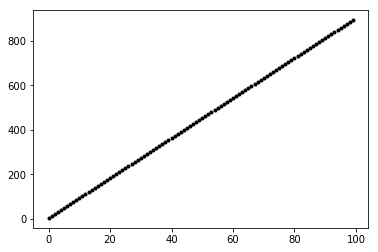

In [14]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100)[0])
pl.plot(x, y, 'k.')

<b>Análisis de Tiempo </b>
 
  <p>A continuación se representa en una gráfica el número de operaciones (negro), tiempo(rojo) y T(n)(azul) que el algoritmo de ordenamiento por inserción requiere para ordenar arreglos de tamaño n (variando n) en el peor de los casos.</p>
  

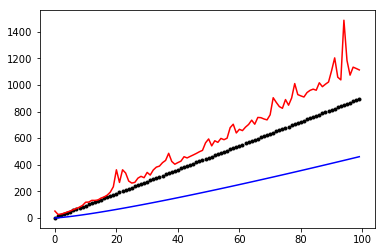

In [15]:
pl.clf()
resultados= []
ti=[]
x = np.arange(100)
resultados = np.array(exper_analysis(100))
y = np.array(resultados[0])
t = np.array(resultados[1]*1000000)
for i in range(100):
    ti.append((i+1)*(math.log(i+1)))
pl.plot(x, y,'k.', t, 'r', ti, 'b')